# 6th Lab of the _"Investment-Management-with-Python-and-Machine-Learning-Specialization"_.

**TOPIC:** Semi Deviation, VaR and CVaR.

There are 4 standard methods for calculating VaR:
1. _historical_
2. _variance-covariance_
3. _parametric non gaussian_
4. _cornish-fisher_

In [26]:
import pandas as pd
import edhec_risk_kit as erk 

%load_ext autoreload 
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**SEMIDEVIATION** : it is a method of measuring the below-mean fluctuations in the returns on investment. It only looks at negative price fluctuations thus it is most often used to evaluate the downside risk of an investment. 

In [4]:
hfi = erk.get_hfi_returns()

c:\Users\User\Desktop\Python\IM with Python\edhec_risk_kit.py:40: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hfi = pd.read_csv(r'C:\Users\User\Desktop\Python\IM with Python\data\edhec-hedgefundindices.csv',


In [5]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [5]:
erk.semidevation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### VaR and CVar

We are going to evaluate VaR in three different ways: 
1. Historic VaR
2. Parametric VaR - Gaussian
3. Modified Cornish-Fisher VaR (most common way of computing VaR)

In [8]:
import numpy as np

**1) Historic VaR**

We are going to use the **np.percentile()** function in order to compute the 5th percentile of the HFI.

In [9]:
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

Let's have these numbers with their specific label:

In [12]:
def var_historic(r, level = 5):
    """
    VaR Historic
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance (r, pd.Series):
        return -np.percentile(r, level)
    else: 
        raise TypeError("Expected r to be Series or DataFrame")

In [13]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

I'm adding this function to ERK.

In [15]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

**2) Parametric VaR - Gaussian**

Let's use **scipy.stats**'s **norm** in order to model the normal distribution. 

In [16]:
from scipy.stats import norm

**norm.ppf()** takes the percentage level and returns the Z-score associated to that. 

In [19]:
z = norm.ppf(.05)
z

-1.6448536269514729

In order to have the VaR at a 5% level:

In [20]:
-(hfi.mean() + z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [23]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

**3) Modified Cornish-Fisher VaR**

Computing a Z-score as if we're dealing with a gaussian distribution even though we're not. Therefore we should adjust the Z-score according to the skewness and kurtosis of the distribution.

In [24]:
erk.var_gaussian(hfi, modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

Let's now compare the three different VaRs we computed: 

<AxesSubplot:title={'center':'EDHEC Hedge Fund Indices: VaR'}>

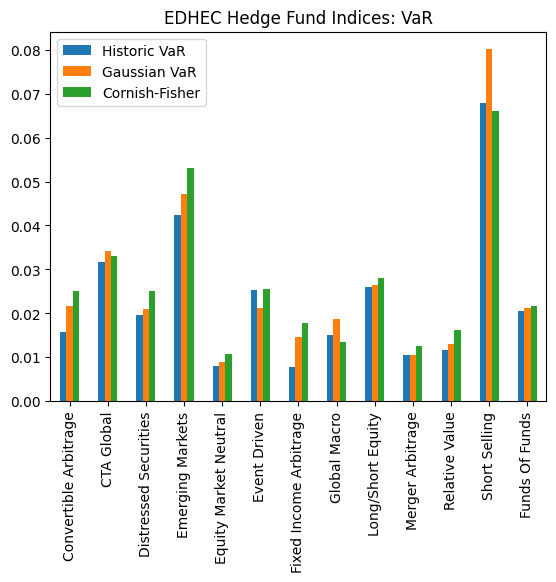

In [25]:
var_list = [erk.var_historic(hfi), erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True)]
comparison = pd.concat(var_list, axis=1)
comparison.columns=["Historic VaR", "Gaussian VaR", "Cornish-Fisher"]
comparison.plot.bar(title="EDHEC Hedge Fund Indices: VaR")

### CVaR

In [27]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64